In [ ]:
import io
import requests
import json
import urllib.request
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import math

# para fazer upload de imagem rápido: https://imgbb.com/

In [ ]:
def getFaces(image_url):
  face_api_url = 'https://brazilsouth.api.cognitive.microsoft.com/face/v1.0/detect'
  subscription_key = ''
  headers = { 'Ocp-Apim-Subscription-Key': subscription_key }    
  params = {
      'returnFaceId': 'true',
      'returnFaceLandmarks': 'false',
      'returnFaceAttributes': 'emotion',
  }
  response = requests.post(face_api_url, params=params, headers=headers, json={"url": image_url})
  faces = response.json()
  return faces

def getEmotion(emotions):
  values = list( emotions.values() )
  index = np.argmax( np.array(values) )
  return list(emotions.keys())[index]

def getEmotionColor(emotion):
  #   descricao           rgb              traducao     cor
  colors = {
      'anger':     [ 213, 0, 0 ],         # raiva    | vermelho
      'contempt':  [ 255, 109, 0 ],       # desprezo | laranja escuro
      'disgust':   [ 98, 0, 234 ],        # nojo     | roxo
      'fear':      [ 0, 77, 64 ],         # medo     | preto
      'happiness': [ 255, 234, 0 ],       # alegria  | amarelo
      'neutral':   [ 255, 255, 255 ],     # neutro   | branco
      'sadness':   [ 41, 98, 255 ],       # triste   | azul
      'surprise':  [ 0, 229, 255  ],      # surpreso | azul claro
  }
  return np.array( colors[emotion], dtype=np.uint8 )

def euclidianDistance(p1, p2):
  return math.sqrt( (p1[0]-p2[0])**2 + (p1[1]-p2[1])**2 )

def markEmotionOnFace(face, mat):
  rect = face['faceRectangle']
  col1, col2 = rect['left'], rect['left'] + rect['width']
  row1, row2 = rect['top'], rect['top'] + rect['height']  

  emotions = face['faceAttributes']['emotion']
  emotion = getEmotion(emotions)
  color = getEmotionColor(emotion)

  # increased faces square
  increase_amout = 20
  row1 -= increase_amout
  row2 += increase_amout
  col1 -= increase_amout
  col2 += increase_amout

  rect = mat[row1:row2, col1:col2]
  center = ( (col2-col1)/2, (row2-row1)/2 )
  maxDistance = min(
    euclidianDistance( center, (col2-col1, center[1]) ),
    euclidianDistance( center, (center[0], row2-row1) ),
  )
  grayIntensity = np.array([ .21, .72, .07 ])
  for i, j in np.ndindex(rect.shape[:-1]):
    pix = rect[i][j]
    gray = (pix * grayIntensity).sum() / 255.
    colored = np.array(color * gray, dtype=np.uint8)
    distance = euclidianDistance( center, (j,i) )
    prcDist = min(1, max(0, distance / maxDistance - 0.2))
    finalColor = pix * prcDist + colored * (1-prcDist)
    rect[i][j] = np.array(finalColor, dtype=np.uint8)

def printEmotionsOnFaces(image_url):
  image_path = image_url.split('/')[-1].split('?')[0]
  urllib.request.urlretrieve(image_url, image_path)
  im = Image.open(image_path)
  mat = np.array(im)  
  faces = getFaces(image_url)
  print('faces:', faces)
  for face in faces:
    markEmotionOnFace(face, mat)
  return mat

def getFacesWithEmotions(image_url):
  mat = printEmotionsOnFaces(image_url)
  Image.fromarray(mat).save('emotionfull.png')
  plt.imshow(mat)
  plt.show()

faces: [{'faceId': 'c6499042-9667-499b-923d-130d8bed6049', 'faceRectangle': {'top': 67, 'left': 282, 'width': 47, 'height': 47}, 'faceAttributes': {'emotion': {'anger': 0.0, 'contempt': 0.0, 'disgust': 0.0, 'fear': 0.0, 'happiness': 0.994, 'neutral': 0.0, 'sadness': 0.006, 'surprise': 0.0}}}, {'faceId': '4035818a-0916-4880-8208-3a5393a5e8b1', 'faceRectangle': {'top': 81, 'left': 67, 'width': 45, 'height': 45}, 'faceAttributes': {'emotion': {'anger': 0.0, 'contempt': 0.001, 'disgust': 0.0, 'fear': 0.0, 'happiness': 0.0, 'neutral': 0.981, 'sadness': 0.019, 'surprise': 0.0}}}, {'faceId': 'f126b223-a7f6-4af4-b122-19f48df5cc0b', 'faceRectangle': {'top': 82, 'left': 487, 'width': 44, 'height': 44}, 'faceAttributes': {'emotion': {'anger': 0.842, 'contempt': 0.0, 'disgust': 0.003, 'fear': 0.04, 'happiness': 0.022, 'neutral': 0.001, 'sadness': 0.005, 'surprise': 0.087}}}, {'faceId': 'f77855d0-174e-4737-8b7e-750e5beb8fc4', 'faceRectangle': {'top': 80, 'left': 385, 'width': 43, 'height': 43}, 'fa

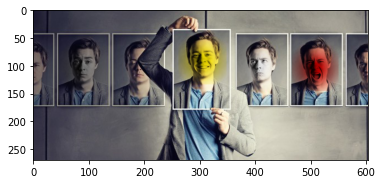

In [ ]:
#getFacesWithEmotions('http://4.bp.blogspot.com/--u7Fho2C3K8/UhIKepmpzqI/AAAAAAAAC7A/lgirTyldrHc/s1600/flo.jpg')
getFacesWithEmotions('https://escoladainteligencia.com.br/wp-content/uploads/2015/08/lidar_emocoes-604x270.jpg')